## Week - 2

In [1]:
import nltk
import spacy
from spacy import displacy
from nltk import CFG
from nltk.parse.chart import ChartParser
import matplotlib.pyplot as plt
import networkx as nx
from collections import Counter

In [2]:
# Download required NLTK data
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Initialize spaCy
nlp = spacy.load("en_core_web_sm")


[nltk_data] Downloading package punkt to /home/rikato/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/rikato/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
def pos_tag_sentence(sentence):
    # Tokenize the sentence
    tokens = nltk.word_tokenize(sentence)
    
    # Perform POS tagging
    pos_tags = nltk.pos_tag(tokens)
    
    return pos_tags


In [4]:
def visualize_pos_tags(sentence):
    # Process the sentence with spaCy
    doc = nlp(sentence)

    # Visualize POS tagging
    options = {"compact": True, "color": "blue"}
    html = displacy.render(doc, style="dep", options=options)

    # Display the visualization
    from IPython.display import display, HTML
    display(HTML(html))


In [5]:
def parse_sentence(sentence, grammar):
    # Create a parser
    parser = ChartParser(grammar)
    
    # Tokenize the sentence
    tokens = nltk.word_tokenize(sentence)
    
    # Parse the sentence
    trees = list(parser.parse(tokens))
    
    return trees


In [6]:
def visualize_parse_tree(tree):
    # Convert the NLTK tree to a NetworkX graph
    graph = nx.Graph()
    
    def add_edges(parent, tree):
        for child in tree:
            if isinstance(child, nltk.Tree):
                graph.add_edge(parent, child.label())
                add_edges(child.label(), child)
            else:
                graph.add_edge(parent, child)
    
    add_edges("ROOT", tree)
    
    # Create a spring layout
    pos = nx.spring_layout(graph)
    
    # Draw the graph
    plt.figure(figsize=(12, 8))
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', 
            node_size=2000, font_size=10, font_weight='bold')
    
    # Add edge labels
    edge_labels = {(u, v): '' for (u, v) in graph.edges()}
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
    
    plt.title("Parse Tree Visualization")
    plt.axis('off')
    plt.show()


In [7]:
def visualize_dependency_parse(sentence):
    doc = nlp(sentence)
    
    # Create a graph
    graph = nx.Graph()
    
    for token in doc:
        graph.add_edge(token.head.text, token.text, label=token.dep_)
    
    # Create a spring layout
    pos = nx.spring_layout(graph)
    
    # Draw the graph
    plt.figure(figsize=(12, 8))
    nx.draw(graph, pos, with_labels=True, node_color='lightgreen', 
            node_size=2000, font_size=10, font_weight='bold')
    
    # Add edge labels
    edge_labels = nx.get_edge_attributes(graph, 'label')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
    
    plt.title("Dependency Parse Visualization")
    plt.axis('off')
    plt.show()


In [8]:
# Example usage
sentence = "The cat chases the mouse"

print("Original sentence:", sentence)

# POS Tagging
pos_tags = pos_tag_sentence(sentence)
print("\nPOS Tags:")
print(pos_tags)
visualize_pos_tags(sentence)

Original sentence: The cat chases the mouse

POS Tags:
[('The', 'DT'), ('cat', 'NN'), ('chases', 'VBZ'), ('the', 'DT'), ('mouse', 'NN')]


<IPython.core.display.HTML object>


Parse Tree:
              S                 
      ________|_____             
     |              VP          
     |         _____|___         
     NP       |         NP      
  ___|___     |      ___|____    
Det      N    V    Det       N  
 |       |    |     |        |   
The     cat chases the     mouse


Visualization of Parse Tree:


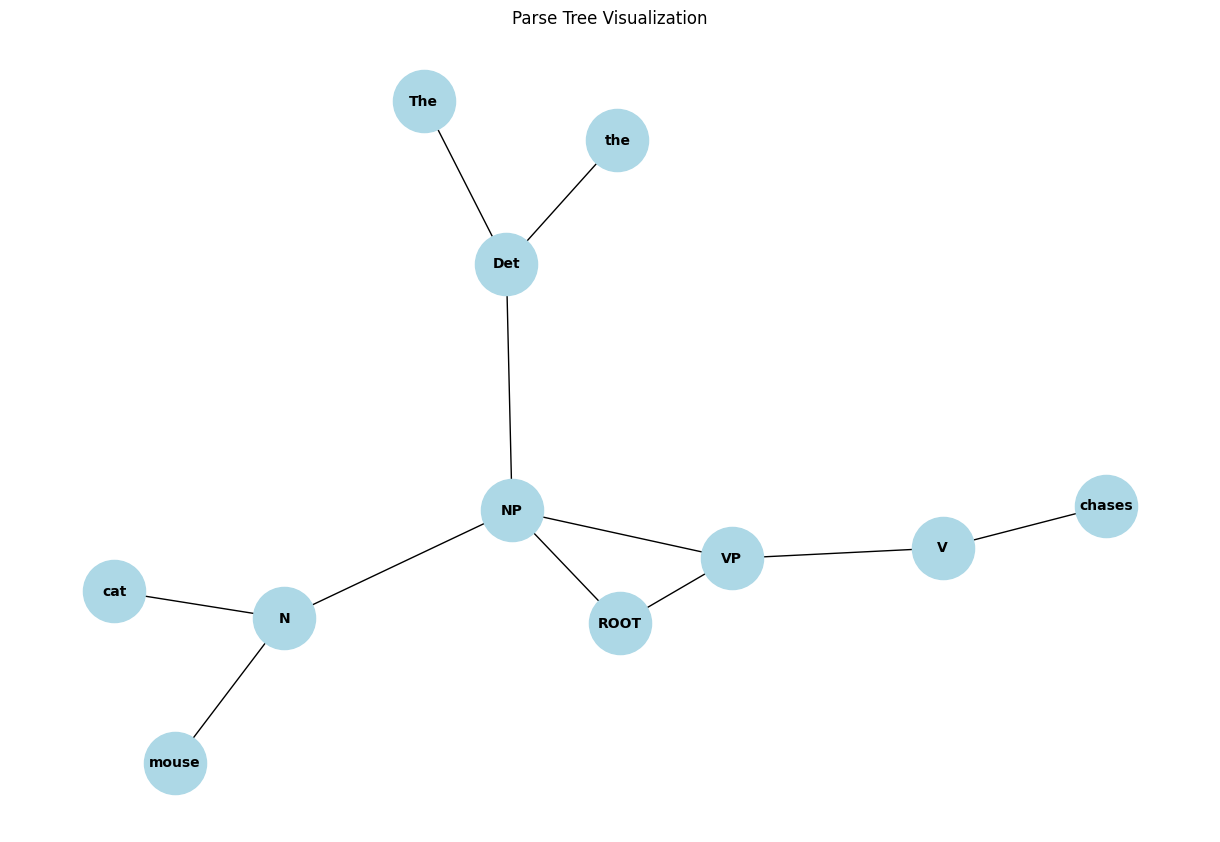


Dependency Parse Visualization:


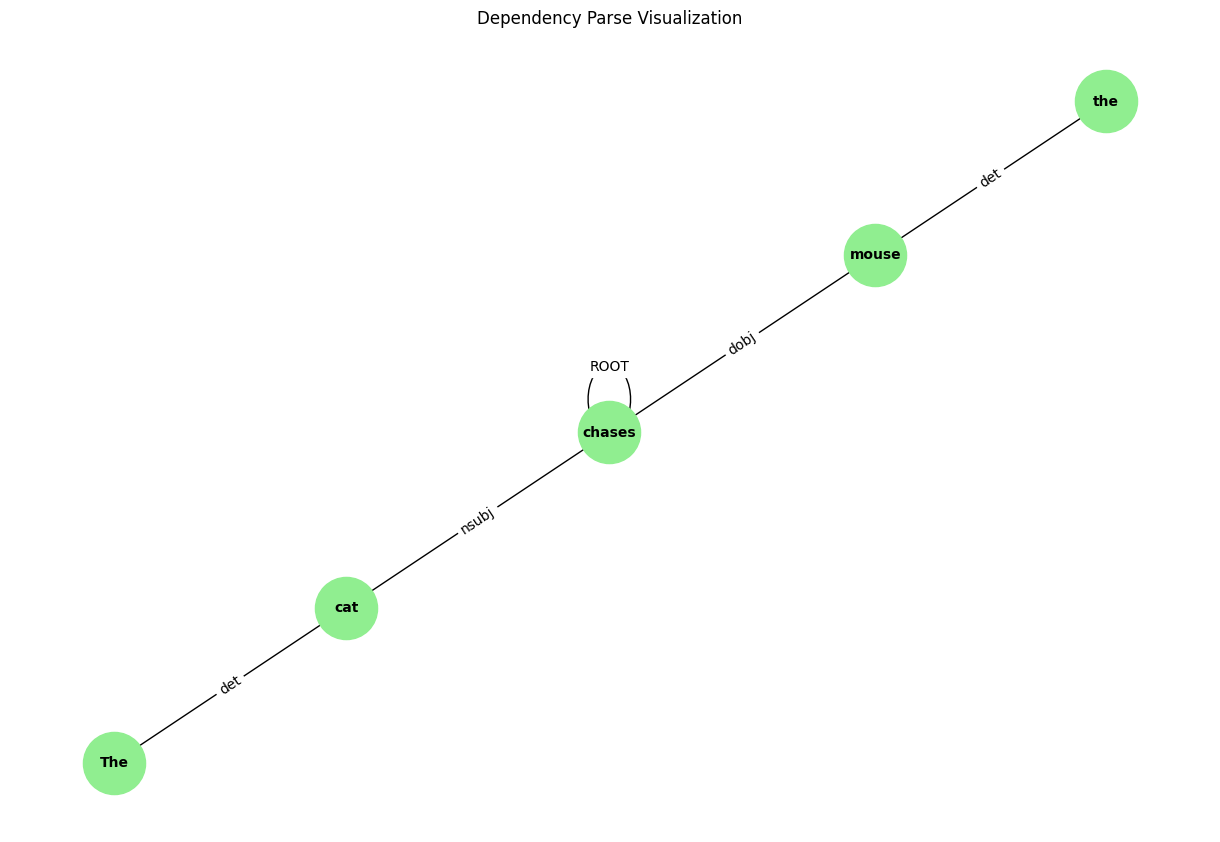

In [9]:
# Define a simple CFG
grammar = CFG.fromstring("""
    S -> NP VP
    NP -> Det N
    VP -> V NP
    Det -> 'The' | 'the'
    N -> 'cat' | 'mouse'
    V -> 'chases'
""")

# Syntax Parsing
parse_trees = parse_sentence(sentence, grammar)

if parse_trees:
    print("\nParse Tree:")
    parse_trees[0].pretty_print()
    
    print("\nVisualization of Parse Tree:")
    visualize_parse_tree(parse_trees[0])
else:
    print("No valid parse found.")

print("\nDependency Parse Visualization:")
visualize_dependency_parse(sentence)